## Merging news data with monthly weather data

In [25]:
import pandas as pd  # Library for data manipulation and analysis

# Load the cleaned news data and the monthly weather data 
news_df = pd.read_csv('News_data.csv')
weather_monthly_df = pd.read_csv('Weather_data_monthly.csv')

In [37]:
# Displaying the "news_df" DataFrame to review its contents.
news_df

,Date,month,article count
0,2011-01-02,2011-01,1
1,2011-01-03,2011-01,2
2,2011-01-04,2011-01,2
3,2011-01-05,2011-01,2
4,2011-01-06,2011-01,4
...,...,...,...
3607,2023-08-10,2023-08,2
3608,2023-08-11,2023-08,5
3609,2023-08-12,2023-08,3
3610,2023-08-13,2023-08,2


In [38]:
# Displaying the "weather_monthly_df" DataFrame
weather_monthly_df

,month,mean temp,mean daily max temp,mean daily min temp,mean wind speed,accumulated precipitation,mean temp anomaly,mean daily max temp anomaly,mean daily min temp anomaly,mean wind speed anomaly,accumulated precipitation anomaly
0,2011-01,0.3,2.6,NaN,4.2,47.8,-1.8,-2.0,NaN,-1.1,-21.5
1,2011-02,-0.1,1.6,NaN,6.5,39.9,-2.1,-3.1,NaN,1.1,-12.7
2,2011-03,3.0,NaN,NaN,5.1,29.9,-0.7,NaN,NaN,0.2,-13.5
3,2011-04,9.9,NaN,NaN,4.7,17.4,2.7,NaN,NaN,-0.0,-19.5
4,2011-05,11.3,NaN,NaN,4.9,54.4,-0.2,NaN,NaN,0.5,5.2
...,...,...,...,...,...,...,...,...,...,...,...
146,2023-03,3.5,6.8,0.2,4.7,78.9,-0.2,-0.1,0.0,-0.2,35.5
147,2023-04,7.0,11.2,2.9,4.5,43.8,-0.2,-0.5,0.1,-0.2,6.9
148,2023-05,11.2,16.0,6.4,4.6,14.1,-0.3,0.3,-0.4,0.2,-35.1
149,2023-06,16.4,21.9,10.7,3.6,27.0,1.3,1.1,-0.5,-0.6,-33.4


In [29]:
# Merge the news data (article_df) with the weather data (weather_df) on the 'month' column
merged_monthly_df = weather_monthly_df.merge(news_df, on='month', how='left')

# Fill any NaN values in 'article count' column with 0 and convert to integer
merged_monthly_df['article count'] = merged_monthly_df['article count'].fillna(0).astype(int)

# Group news_df by 'month' and aggregate the sum of 'article count'
news_monthly_summary = news_df.groupby('month').agg({'article count': 'sum'}).reset_index()

# Merge the weather_monthly_df with the aggregated news_monthly_summary
merged_monthly_df = weather_monthly_df.merge(news_monthly_summary, on='month', how='left')

# Fill any NaN values in 'article count' column with 0 and convert to integer
merged_monthly_df['article count'] = merged_monthly_df['article count'].fillna(0).astype(int)

# Save the merged dataframe to a CSV file
merged_monthly_df.to_csv('Final_monthly_data.csv', index=False)


merged_monthly_df


,month,mean temp,mean daily max temp,mean daily min temp,mean wind speed,accumulated precipitation,mean temp anomaly,mean daily max temp anomaly,mean daily min temp anomaly,mean wind speed anomaly,accumulated precipitation anomaly,article count
0,2011-01,0.3,2.6,NaN,4.2,47.8,-1.8,-2.0,NaN,-1.1,-21.5,49
1,2011-02,-0.1,1.6,NaN,6.5,39.9,-2.1,-3.1,NaN,1.1,-12.7,53
2,2011-03,3.0,NaN,NaN,5.1,29.9,-0.7,NaN,NaN,0.2,-13.5,37
3,2011-04,9.9,NaN,NaN,4.7,17.4,2.7,NaN,NaN,-0.0,-19.5,44
4,2011-05,11.3,NaN,NaN,4.9,54.4,-0.2,NaN,NaN,0.5,5.2,52
...,...,...,...,...,...,...,...,...,...,...,...,...
146,2023-03,3.5,6.8,0.2,4.7,78.9,-0.2,-0.1,0.0,-0.2,35.5,59
147,2023-04,7.0,11.2,2.9,4.5,43.8,-0.2,-0.5,0.1,-0.2,6.9,68
148,2023-05,11.2,16.0,6.4,4.6,14.1,-0.3,0.3,-0.4,0.2,-35.1,82
149,2023-06,16.4,21.9,10.7,3.6,27.0,1.3,1.1,-0.5,-0.6,-33.4,71


## Visualization

In [44]:
anomaly_columns = [
    "mean temp anomaly",
    "mean daily max temp anomaly",
    "mean daily min temp anomaly",
    "mean wind speed anomaly",
    "accumulated precipitation anomaly"
]

# For each anomaly column, calculate the absolute value and create a new column
for col in anomaly_columns:
    new_col_name = col + " abs"
    merged_monthly_df[new_col_name] = merged_monthly_df[col].abs()


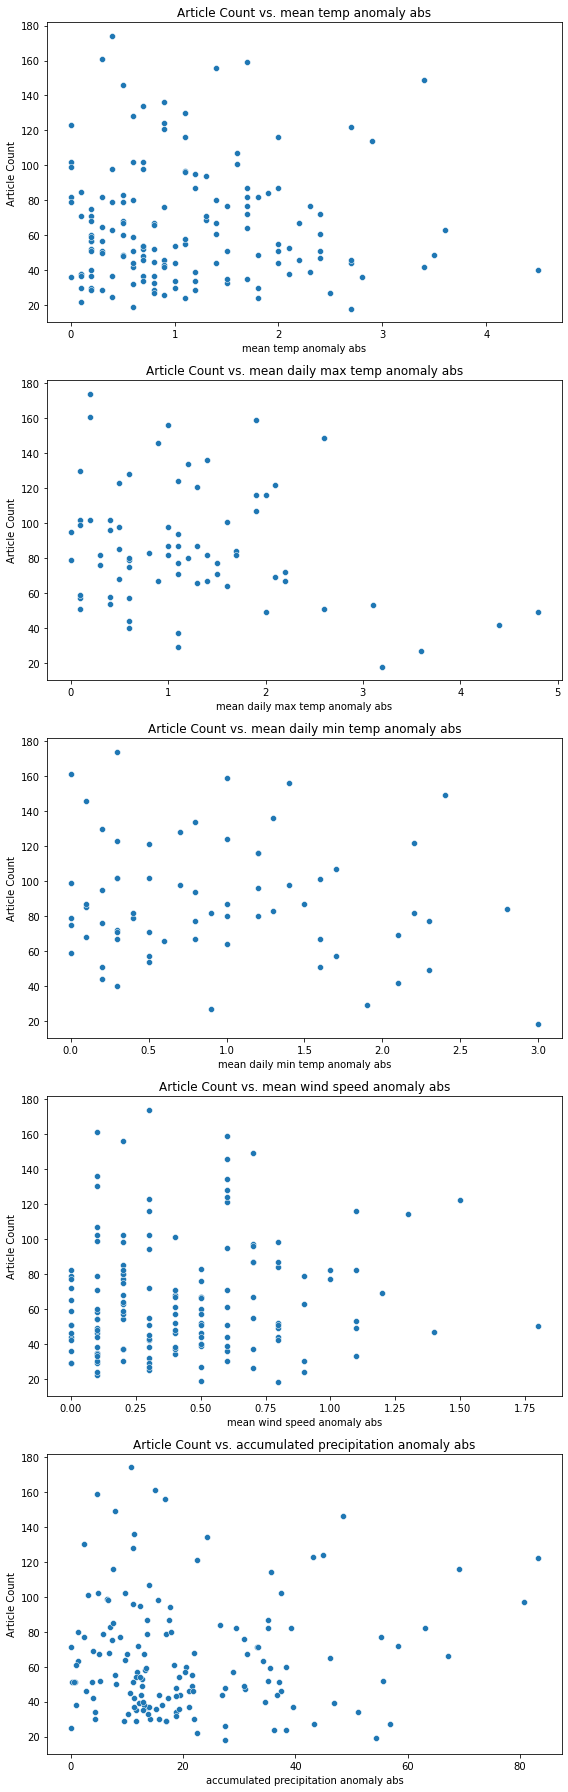

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Names of the new absolute anomaly columns
abs_anomaly_columns = [col + " abs" for col in anomaly_columns]

# Set up a figure with multiple subplots
fig, axes = plt.subplots(nrows=len(abs_anomaly_columns), figsize=(8, 5*len(abs_anomaly_columns)))

for i, col in enumerate(abs_anomaly_columns):
    sns.scatterplot(data=merged_monthly_df, x=col, y="article count", ax=axes[i])
    axes[i].set_title(f"Article Count vs. {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Article Count")

plt.tight_layout()
plt.show()


In [32]:
# Calculate correlations of all columns with 'article count'
correlations = merged_monthly_df.corr()["article count"].drop("article count")

# Print the correlation values
print(correlations)


mean temp                                0.033409
mean daily max temp                      0.030904
mean daily min temp                      0.087470
mean wind speed                          0.026404
accumulated precipitation                0.160924
mean temp anomaly                        0.174883
mean daily max temp anomaly              0.131238
mean daily min temp anomaly              0.177229
mean wind speed anomaly                  0.017318
accumulated precipitation anomaly        0.097272
mean temp anomaly abs                   -0.003830
mean daily max temp anomaly abs         -0.255846
mean daily min temp anomaly abs         -0.135053
mean wind speed anomaly abs              0.101420
accumulated precipitation anomaly abs    0.044231
Name: article count, dtype: float64


Correlation between mean temp anomaly and article count: 0.17


NameError: name 'calendar' is not defined

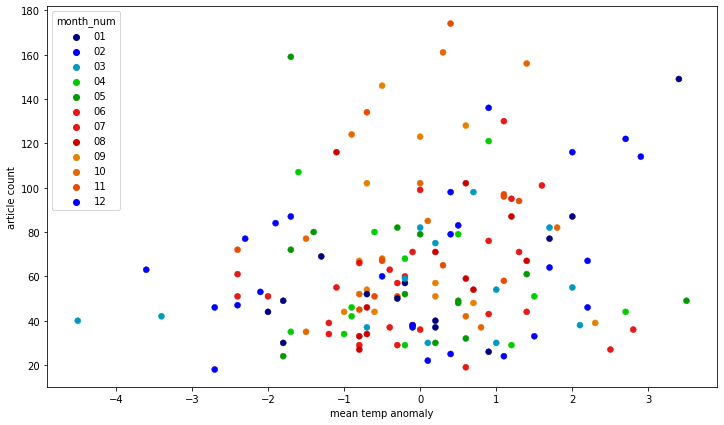

In [33]:
# Create a 'month_num' column to extract month from the 'month' column
merged_monthly_df['month_num'] = merged_monthly_df['month'].str.split('-').str[1]

# Define colors for each month:
months_colors = {
    "01": (0, 0, 0.5, 1),     # Dark blue
    "02": (0, 0, 1, 1),   # Medium blue
    "03": (0, 0.6, 0.75, 1), # Light blue
    "04": (0, 0.8, 0, 1),    # Light green
    "05": (0, 0.6, 0, 1),    # Medium green
    "06": (0.9, 0, 0, 0.9),  # Transparent red
    "07": (0.9, 0, 0, 0.9),  # Transparent red
    "08": (0.8, 0, 0, 1),    # Medium red
    "09": (0.9, 0.5, 0, 1),  # Light orange
    "10": (0.9, 0.4, 0, 1),  # Medium orange
    "11": (0.9, 0.3, 0, 1),  # Dark orange
    "12": (0, 0, 1, 1)    # Darkest blue
}

# List of columns for which correlation with 'article count' will be computed
columns_to_correlate = [ 
    'mean temp anomaly', 'mean daily max temp anomaly', 
    'mean daily min temp anomaly', 'mean wind speed anomaly', 
    'accumulated precipitation anomaly'
]

# Compute and print the correlation
for column in columns_to_correlate:
    correlation = merged_monthly_df[column].corr(merged_monthly_df['article count'])
    print(f"Correlation between {column} and article count: {correlation:.2f}")
    
    # Plot scatter plot for each correlation using seaborn
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=merged_monthly_df, x=column, y='article count', hue='month_num', palette=months_colors, edgecolor=None, legend="brief")
    
    # Provide a custom legend
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = [calendar.month_abbr[int(label)] if label.isdigit() else label for label in labels]
    plt.legend(handles=handles, labels=labels, title="Month")
    
    plt.title(f'Scatter plot between {column} and Article Count', fontsize=15)
    plt.xlabel(column, fontsize=13)


In [ ]:
# Create a 'month_num' column to extract month from the 'month' column
merged_monthly_df['month_num'] = merged_monthly_df['month'].str.split('-').str[1]

# Plot bar plot of 'article count' vs 'month' using matplotlib
plt.figure(figsize=(14, 8))
bars = plt.bar(np.arange(len(merged_monthly_df)), merged_monthly_df['article count'], color=merged_monthly_df['month_num'].map(months_colors))

# Set x-ticks to month values
plt.xticks(np.arange(len(merged_monthly_df)), merged_monthly_df['month'].values, rotation=45)

# Create a custom legend using colors and labels
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=calendar.month_abbr[int(month)]) for month, color in months_colors.items()]
plt.legend(handles=legend_elements, title="Month")

plt.title('Article Count over Time', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Article Count', fontsize=13)
plt.tight_layout()
plt.show()


In [ ]:
# Extract year from 'month' column
merged_monthly_df['year'] = merged_monthly_df['month'].str.split('-').str[0]

# Group by year and sum the article counts
yearly_counts = merged_monthly_df.groupby('year')['article count'].sum()

# Plot the aggregated data
plt.figure(figsize=(12, 7))
yearly_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Yearly Progression in Article Count', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total Article Count', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
# Read the CSV file
df_news_testing = pd.read_csv('News_testing.csv')

# Display the dataframe
df_news_testing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract year from the month column
df_news_testing['year'] = df_news_testing['month'].str[:4]

unique_terms = df_news_testing['Term'].unique()

# Create a plot for each Term
for term in unique_terms:
    # Filter dataframe for the current term
    term_df = df_news_testing[df_news_testing['Term'] == term]
    
    # Group by year and sum the article count
    yearly_counts = term_df.groupby('year')['article count'].sum().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 7))
    plt.bar(yearly_counts['year'], yearly_counts['article count'], color='steelblue')
    plt.xlabel('Year')
    plt.ylabel('Article Count')
    plt.title(f'Article Count for Term "{term}" over Years')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [ ]:
bla = pd.read_csv('jyllands_posten_data.csv')
bla

In [ ]:
# Convert the Date column to a pandas datetime format
bla['Date'] = pd.to_datetime(bla['Date'])

# Group by the Date and Term columns to count the occurrences of each term on each date
term_counts = bla.groupby(['Date', 'Term']).size().reset_index(name='Counts')

# Pivot the data so each term has its own column with dates as the index
pivoted_data = term_counts.pivot(index='Date', columns='Term', values='Counts').fillna(0)

# Plot the data
plt.figure(figsize=(15, 8))

for term in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[term], label=term)

plt.xlabel('Date')
plt.ylabel('Article Count')
plt.title('Article Counts for Different Terms over Time')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the Date column to a pandas datetime format
bla['Date'] = pd.to_datetime(bla['Date'])

# Extract year from Date column
bla['Year'] = bla['Date'].dt.year

# Group by year and count the total articles
yearly_counts = bla.groupby('Year').size().reset_index(name='Article Count')

# Plot the aggregated data
plt.figure(figsize=(15, 8))
plt.bar(yearly_counts['Year'], yearly_counts['Article Count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Articles')
plt.title('Total Articles per Year')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## OLS

In [ ]:
import statsmodels.api as sm
import numpy as np  # Ensure you have numpy imported


# Create squared anomaly variables
merged_monthly_df['mean temp anomaly squared'] = merged_monthly_df['mean temp anomaly'] ** 2
merged_monthly_df['mean wind speed anomaly squared'] = merged_monthly_df['mean wind speed anomaly'] ** 2
merged_monthly_df['accumulated precipitation anomaly squared'] = merged_monthly_df['accumulated precipitation anomaly'] ** 2

# Independent Variables (only squared terms)
X = merged_monthly_df[['mean temp anomaly squared',
                       'mean wind speed anomaly squared',
                       'accumulated precipitation anomaly squared']]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Dependent Variable, taking the natural logarithm of 'article count'
y = np.log(merged_monthly_df['article count'])

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Coefficient Plot
coef = model.params
coef_ci = model.conf_int()
coef_names = coef.index

plt.figure(figsize=(10,6))
plt.errorbar(y=coef_names, x=coef, xerr=(coef-coef_ci[0], coef_ci[1]-coef), fmt='o')
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Coefficient Plot with 95% Confidence Intervals")
plt.xlabel("Coefficient Value")
plt.ylabel("Predictor Variables")
plt.grid(True)
plt.show()

# Residuals vs Fitted Values Plot
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(10,6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [ ]:
import statsmodels.api as sm
import pandas as pd
from scipy.stats import f

# Assuming that the 'year' column is represented by the 'month' column in which the year is extracted from the 'month' column
merged_monthly_df['year'] = pd.to_datetime(merged_monthly_df['month']).dt.year

# Split the dataset
before_2019 = merged_monthly_df[merged_monthly_df['year'] < 2019]
after_2019 = merged_monthly_df[merged_monthly_df['year'] >= 2019]

# Model for the entire period
X_full = sm.add_constant(merged_monthly_df[['mean temp anomaly squared',
                                           'mean wind speed anomaly squared',
                                           'accumulated precipitation anomaly squared']])
y_full = merged_monthly_df['article count']
model_full = sm.OLS(y_full, X_full).fit()
SSR_full = model_full.ssr

# Model for before 2019
X_before = sm.add_constant(before_2019[['mean temp anomaly squared',
                                        'mean wind speed anomaly squared',
                                        'accumulated precipitation anomaly squared']])
y_before = before_2019['article count']
model_before = sm.OLS(y_before, X_before).fit()
SSR1 = model_before.ssr

# Model for after 2019
X_after = sm.add_constant(after_2019[['mean temp anomaly squared',
                                      'mean wind speed anomaly squared',
                                      'accumulated precipitation anomaly squared']])
y_after = after_2019['article count']
model_after = sm.OLS(y_after, X_after).fit()
SSR2 = model_after.ssr

# Compute the Chow test statistic
k = len(X_full.columns)
n = len(merged_monthly_df)
F = ((SSR_full - (SSR1 + SSR2)) / k) / ((SSR1 + SSR2) / (n - 2*k))

print("Chow Test Statistic:", F)

alpha = 0.05  # significance level
df1 = k  # numerator degrees of freedom
df2 = n - 2*k  # denominator degrees of freedom

f_critical = f.ppf(1 - alpha, df1, df2)
print(f"Critical value at alpha={alpha}: {f_critical}")

# Conclusions based on the Chow Test
if F > f_critical:
    print("The coefficients in the regressions before and after 2019 are statistically different, indicating a structural break in 2019.")
else:
    print("There's no evidence to suggest a structural difference in the regressions before and after 2019.")


In [ ]:
# Convert 'year' column to integers (if not already)
merged_monthly_df['year'] = merged_monthly_df['year'].astype(int)

# Create the 'pre_2019' and 'post_2019' dummy variables
merged_monthly_df['pre_2019'] = (merged_monthly_df['year'] < 2019).astype(int)
merged_monthly_df['post_2019'] = (merged_monthly_df['year'] >= 2019).astype(int)

# Create squared anomaly variables
merged_monthly_df['temp_anomaly_squared'] = merged_monthly_df['mean temp anomaly'] ** 2
merged_monthly_df['wind_speed_anomaly_squared'] = merged_monthly_df['mean wind speed anomaly'] ** 2
merged_monthly_df['precip_anomaly_squared'] = merged_monthly_df['accumulated precipitation anomaly'] ** 2

# Create interaction terms for before and after 2019
merged_monthly_df['temp_anomaly_squared_pre2019'] = merged_monthly_df['pre_2019'] * merged_monthly_df['temp_anomaly_squared']
merged_monthly_df['wind_speed_anomaly_squared_pre2019'] = merged_monthly_df['pre_2019'] * merged_monthly_df['wind_speed_anomaly_squared']
merged_monthly_df['precip_anomaly_squared_pre2019'] = merged_monthly_df['pre_2019'] * merged_monthly_df['precip_anomaly_squared']

merged_monthly_df['temp_anomaly_squared_post2019'] = merged_monthly_df['post_2019'] * merged_monthly_df['temp_anomaly_squared']
merged_monthly_df['wind_speed_anomaly_squared_post2019'] = merged_monthly_df['post_2019'] * merged_monthly_df['wind_speed_anomaly_squared']
merged_monthly_df['precip_anomaly_squared_post2019'] = merged_monthly_df['post_2019'] * merged_monthly_df['precip_anomaly_squared']

# Independent Variables: interaction terms
X = merged_monthly_df[['temp_anomaly_squared_pre2019', 'wind_speed_anomaly_squared_pre2019', 'precip_anomaly_squared_pre2019',
               'temp_anomaly_squared_post2019', 'wind_speed_anomaly_squared_post2019', 'precip_anomaly_squared_post2019']]

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Dependent Variable
y = merged_monthly_df['article count']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
print(model.summary())


In [ ]:
merged_monthly_df